# Groundwater Concentration Data Cleaning and Visualization #

## December 2023 ##

In [96]:
require(readxl)
require(lubridate)
require(dplyr)
require(tidyr)
require(janitor)
require(ggplot2)
require(writexl)

**Import datasets (hydrocarbon constituent concentrations, sulfate concentrations, sulfate injections):**

In [97]:
Data <- read_excel("~/Library/Mobile Documents/com~apple~CloudDocs/DATA NOTES/Data Files/Sample Data PHC (2).xlsx")
head(Data)

New names:
• `` -> `...4`
• `` -> `...6`
• `` -> `...8`
• `` -> `...10`
• `` -> `...12`
• `` -> `...14`


Monitoring Well,Date Sampled,GRO,...4,DRO,...6,Benzene,...8,Toluene,...10,Ethylbenzene,...12,Total Xylenes,...14,Total hydrocarbons
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A,1995-08-04,ND,NA,2.6,NA,ND,NA,ND,NA,ND,NA,2E-3,NA,0
A,1996-08-20,ND,NA,2.7,NA,ND,NA,ND,NA,ND,NA,ND,NA,0
A,1997-08-27,ND,NA,2.0499999999999998,NA,ND,NA,ND,NA,ND,NA,ND,NA,0
A,1998-08-26,--,NA,1.84,NA,ND,NA,ND,NA,ND,NA,ND,NA,0
A,1999-08-25,ND,NA,1.4,NA,ND,NA,ND,NA,ND,NA,ND,NA,0


In [98]:
sulfate_data <- read_excel("~/Library/Mobile Documents/com~apple~CloudDocs/DATA NOTES/Data Files/Sample Data Sulfate (1).xlsx")
head(sulfate_data)

Monitoring Well,Sample_name,Date,Sulfate
<chr>,<chr>,<chr>,<chr>
A,A,39663,51.3
A,A,40040,54.9
A,A,40391.488194444442,37.799999999999997
A,A,40766,59.9
A,A,41116,45.2
A,A,41177,45.6


In [99]:
sulfate_injections_data <- read_excel("~/Library/Mobile Documents/com~apple~CloudDocs/DATA NOTES/Data Files/sulfate injections dataset (1).xlsx")
head(sulfate_injections_data)

Year,Type,Well ID (injection type)
<dbl>,<chr>,<chr>
2012,Push-pull,C
2012,Push-pull,E
2013,Push-pull,C
2013,Push-pull,E
2014,Push-pull,A
2014,Push-pull,G


### Data Cleaning (hydrocarbon constituent concentrations): ###

Format class: 

In [100]:
Data$Date <- as.Date(Data$`Date Sampled`)
Data$MW <- as.factor(Data$`Monitoring Well`)

Write function to create new column indicating whether the constituent was detected (1) or not detected (0).

In [101]:
detcol <- function(x){
  ifelse(grepl("ND", x), 0, 1)}

Write function to remove "ND"s from the dataframe and round each concentration result to 5 decimal places:

In [102]:
cleancols <- function(c){
  gsub("ND", "", c) %>% as.numeric(c, na.rm = FALSE, 5) %>%
    round(5)}


*Clean and format Data for compatability with ProUCL statistical software:*

Create detections column for each constituent: 

In [103]:
Data$GRO_detections <- detcol(Data$GRO)
Data$DRO_detections <- detcol(Data$DRO)
Data$Benzene_detections <- detcol(Data$Benzene)
Data$Toluene_detections <- detcol(Data$Toluene)
Data$Ethylbenzene_detections <- detcol(Data$Ethylbenzene)
Data$Total_xylenes_detections <- detcol(Data$`Total Xylenes`)

Remove "ND"s and round results:

In [104]:
Data$GRO <- cleancols(Data$GRO)
Data$DRO <- cleancols(Data$DRO)
Data$Benzene <- cleancols(Data$Benzene)
Data$Toluene <- cleancols(Data$Toluene)
Data$Ethylbenzene <- cleancols(Data$Ethylbenzene)
Data$`Total Xylenes` <- cleancols(Data$`Total Xylenes`)
Data

Warning message in gsub("ND", "", c) %>% as.numeric(c, na.rm = FALSE, 5) %>% round(5):
“NAs introduced by coercion”
Warning message in gsub("ND", "", c) %>% as.numeric(c, na.rm = FALSE, 5) %>% round(5):
“NAs introduced by coercion”
Warning message in gsub("ND", "", c) %>% as.numeric(c, na.rm = FALSE, 5) %>% round(5):
“NAs introduced by coercion”
Warning message in gsub("ND", "", c) %>% as.numeric(c, na.rm = FALSE, 5) %>% round(5):
“NAs introduced by coercion”
Warning message in gsub("ND", "", c) %>% as.numeric(c, na.rm = FALSE, 5) %>% round(5):
“NAs introduced by coercion”
Warning message in gsub("ND", "", c) %>% as.numeric(c, na.rm = FALSE, 5) %>% round(5):
“NAs introduced by coercion”


Monitoring Well,Date Sampled,GRO,...4,DRO,...6,Benzene,...8,Toluene,...10,⋯,...14,Total hydrocarbons,Date,MW,GRO_detections,DRO_detections,Benzene_detections,Toluene_detections,Ethylbenzene_detections,Total_xylenes_detections
<chr>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,1,1,1,1,1,1
A,1995-08-04 00:00:00,NA,NA,2.600,NA,NA,NA,NA,NA,⋯,NA,0,1995-08-04,A,0,1,0,0,0,1
A,1996-08-20 00:00:00,NA,NA,2.700,NA,NA,NA,NA,NA,⋯,NA,0,1996-08-20,A,0,1,0,0,0,0
A,1997-08-27 00:00:00,NA,NA,2.050,NA,NA,NA,NA,NA,⋯,NA,0,1997-08-27,A,0,1,0,0,0,0
A,1998-08-26 00:00:00,NA,NA,1.840,NA,NA,NA,NA,NA,⋯,NA,0,1998-08-26,A,1,1,0,0,0,0
A,1999-08-25 00:00:00,NA,NA,1.400,NA,NA,NA,NA,NA,⋯,NA,0,1999-08-25,A,0,1,0,0,0,0
A,2000-08-22 00:00:00,NA,NA,3.800,NA,NA,NA,NA,NA,⋯,NA,0,2000-08-22,A,1,1,0,0,0,0
A,2001-08-12 00:00:00,NA,NA,2.840,NA,NA,NA,NA,NA,⋯,NA,0,2001-08-12,A,1,1,0,0,0,0
A,2002-08-18 00:00:00,NA,NA,3.970,NA,NA,NA,NA,NA,⋯,NA,0,2002-08-18,A,0,1,0,0,0,0


Filter to remove duplicate samples, keeping only the highest result:

In [105]:
Data <- Data %>% group_by(MW, Date) %>% filter(GRO == max(GRO)) %>% 
  filter(Benzene == max(Benzene)) %>% filter(Toluene == max(Toluene)) %>% filter(Ethylbenzene == max(Ethylbenzene)) %>%
  filter(`Total Xylenes` == max(`Total Xylenes`))
Data

Monitoring Well,Date Sampled,GRO,...4,DRO,...6,Benzene,...8,Toluene,...10,⋯,...14,Total hydrocarbons,Date,MW,GRO_detections,DRO_detections,Benzene_detections,Toluene_detections,Ethylbenzene_detections,Total_xylenes_detections
<chr>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,2004-08-24 00:00:00,0.0900,NA,2.870,NA,0.00050,NA,0.00200,NA,⋯,NA,0,2004-08-24,A,0,1,0,0,0,0
A,2005-07-24 00:00:00,0.0900,NA,3.310,NA,0.00050,NA,0.00200,NA,⋯,NA,0,2005-07-24,A,0,1,0,0,0,0
A,2006-09-09 00:00:00,0.1000,NA,1.790,NA,0.00050,NA,0.00200,NA,⋯,NA,0,2006-09-09,A,0,1,0,0,0,0
A,2006-09-09 00:00:00,0.1000,NA,4.770,NA,0.00050,NA,0.00200,NA,⋯,NA,0,2006-09-09,A,0,1,0,0,0,0
A,2007-09-08 00:00:00,0.1170,NA,7.180,NA,0.00050,NA,0.00200,NA,⋯,NA,0,2007-09-08,A,1,1,0,0,1,1
A,2008-08-03 00:00:00,0.1000,NA,4.640,NA,0.00050,NA,0.00200,NA,⋯,NA,0,2008-08-03,A,0,1,0,0,0,0
A,2009-08-15 08:30:00,0.0325,J,2.610,NA,0.00025,J,0.00200,NA,⋯,NA,0,2009-08-15,A,1,1,1,0,0,0
A,2010-08-01 11:43:00,0.1000,NA,2.980,NA,0.00050,NA,0.00200,NA,⋯,NA,0,2010-08-01,A,0,1,0,0,0,0
A,2011-08-11 07:20:00,0.1000,NA,2.900,NA,0.00050,NA,0.00200,NA,⋯,NA,0,2011-08-11,A,0,1,0,0,0,0


Calculate total hydrocarbons in new column:

In [106]:
Data$total_hydrocarbons <- as.numeric(Data$GRO + Data$DRO + Data$Benzene + Data$Toluene + 
                                        Data$Ethylbenzene + Data$`Total Xylenes`)
Data

Monitoring Well,Date Sampled,GRO,...4,DRO,...6,Benzene,...8,Toluene,...10,⋯,Total hydrocarbons,Date,MW,GRO_detections,DRO_detections,Benzene_detections,Toluene_detections,Ethylbenzene_detections,Total_xylenes_detections,total_hydrocarbons
<chr>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<date>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,2004-08-24 00:00:00,0.0900,NA,2.870,NA,0.00050,NA,0.00200,NA,⋯,0,2004-08-24,A,0,1,0,0,0,0,2.96650
A,2005-07-24 00:00:00,0.0900,NA,3.310,NA,0.00050,NA,0.00200,NA,⋯,0,2005-07-24,A,0,1,0,0,0,0,3.40650
A,2006-09-09 00:00:00,0.1000,NA,1.790,NA,0.00050,NA,0.00200,NA,⋯,0,2006-09-09,A,0,1,0,0,0,0,1.89850
A,2006-09-09 00:00:00,0.1000,NA,4.770,NA,0.00050,NA,0.00200,NA,⋯,0,2006-09-09,A,0,1,0,0,0,0,4.87850
A,2007-09-08 00:00:00,0.1170,NA,7.180,NA,0.00050,NA,0.00200,NA,⋯,0,2007-09-08,A,1,1,0,0,1,1,7.30940
A,2008-08-03 00:00:00,0.1000,NA,4.640,NA,0.00050,NA,0.00200,NA,⋯,0,2008-08-03,A,0,1,0,0,0,0,4.74650
A,2009-08-15 08:30:00,0.0325,J,2.610,NA,0.00025,J,0.00200,NA,⋯,0,2009-08-15,A,1,1,1,0,0,0,2.64875
A,2010-08-01 11:43:00,0.1000,NA,2.980,NA,0.00050,NA,0.00200,NA,⋯,0,2010-08-01,A,0,1,0,0,0,0,3.08650
A,2011-08-11 07:20:00,0.1000,NA,2.900,NA,0.00050,NA,0.00200,NA,⋯,0,2011-08-11,A,0,1,0,0,0,0,3.00650


Organize columns and write cleaned Data dataframe to excel:

In [107]:
Data2 <- Data[,c(1,16,3,18,5,19,7,20,9,21,11,22,13,23,24)]
write_xlsx(Data2, "Cleaned Data")

*Cleaning, summarizing and visualizing sulfate concentration and injections data:*

Clean sulfate_injections_data, format class:

In [108]:
sulfate_injections_data <- clean_names(sulfate_injections_data)
sulfate_injections_data$year <- ymd(sulfate_injections_data$year, truncated = 2L) #convert to date
sulfate_injections_data$MW <- as.factor(sulfate_injections_data$well_id_injection_type)
sulfate_injections_data

year,type,well_id_injection_type,MW
<date>,<chr>,<chr>,<fct>
2012-01-01,Push-pull,C,C
2012-01-01,Push-pull,E,E
2013-01-01,Push-pull,C,C
2013-01-01,Push-pull,E,E
2014-01-01,Push-pull,A,A
2014-01-01,Push-pull,G,G
2014-01-01,Push-pull,E,E
2014-01-01,Push-pull,L,L
2015-01-01,Sulfate injection,E,E


Extract and format injection and push-pull dates from sulfate_injections_data for use in ggplot:

In [109]:
injdates <- sulfate_injections_data %>% filter(type %in% c("Sulfate injection"))
injdates$type <- as.factor(injdates$type)
injdatesonly <- as.data.frame(injdates$year)
injdatesonly <- as.data.frame(injdates$year) %>% mutate(inj_date = injdates$year)
pushpulldates <- sulfate_injections_data %>% filter(type %in% c("Push-pull"))
pushpulldates$type <- as.factor(pushpulldates$type)
pushpulldatesonly <- as.data.frame(pushpulldates$year)
pushpulldatesonly <- as.data.frame(pushpulldates$year) %>% mutate(push_date = pushpulldates$year)

Format sulfate_data column class:

In [110]:
sulfate_data$Date <- as.Date(as.numeric(as.character(sulfate_data$Date)), origin = "1899-12-30")
sulfate_data$Sulfate <- as.numeric(sulfate_data$Sulfate)
sulfate_data$MW <- as.factor(sulfate_data$`Monitoring Well`)
sulfate_data

Warning message in as.Date(as.numeric(as.character(sulfate_data$Date)), origin = "1899-12-30"):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Monitoring Well,Sample_name,Date,Sulfate,MW
<chr>,<chr>,<date>,<dbl>,<fct>
A,A,2008-08-03,51.3,A
A,A,2009-08-15,54.9,A
A,A,2010-08-01,37.8,A
A,A,2011-08-11,59.9,A
A,A,2012-07-26,45.2,A
A,A,2012-09-25,45.6,A
A,A,2013-07-30,22.8,A
A,A,2013-08-16,28.1,A
A,A,2013-09-01,22.4,A


Filter sulfate_data to remove duplicate samples, keeping only the highest result; and 
remove data from Monitoring Well "N" which is not considered to have independent concentration results. 

In [111]:
sulfate_data2 <- sulfate_data %>% group_by(MW, Date) %>% filter(Sulfate == max(Sulfate)) %>% 
  filter(!MW %in% "N")

*Calculate summary statistics:*

Calculate mean sitewide sulfate concentrations by year:

In [112]:
sulfatemeans <- sulfate_data2 %>% group_by(year = floor_date(Date, "year")) %>%
  summarize(meansulfate = mean(Sulfate))
head(sulfatemeans)

year,meansulfate
<date>,<dbl>
2008-01-01,28.36000
2009-01-01,29.45258
2010-01-01,25.72667
2011-01-01,28.96000
2012-01-01,38.92435
2013-01-01,22.71982


Calculate yearly mean sulfate concentrations by well:

In [113]:
sulfatemeansbywell <- sulfate_data2 %>% group_by(MW, year = floor_date(Date, "year")) %>%
  summarize(meansulfate = mean(Sulfate))
head(sulfatemeansbywell)

`summarise()` has grouped output by 'MW'. You can override using the `.groups`
argument.


MW,year,meansulfate
<fct>,<date>,<dbl>
A,2008-01-01,51.300
A,2009-01-01,54.900
A,2010-01-01,37.800
A,2011-01-01,59.900
A,2012-01-01,45.400
A,2013-01-01,22.575


Calculate sitewide baseline (pre-2012) sulfate concentrations:

In [114]:
meansulfatebaseline <- sulfate_data2 %>% filter(Date < '2012-01-01')
meansulfatebaseline <- mean(meansulfatebaseline$Sulfate)
meansulfatebaseline

[1] 28.07616

*Create time-series visualizations of Data by Monitoring Well:*

Total petroleum hydrocarbons (TPH) at all wells:

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


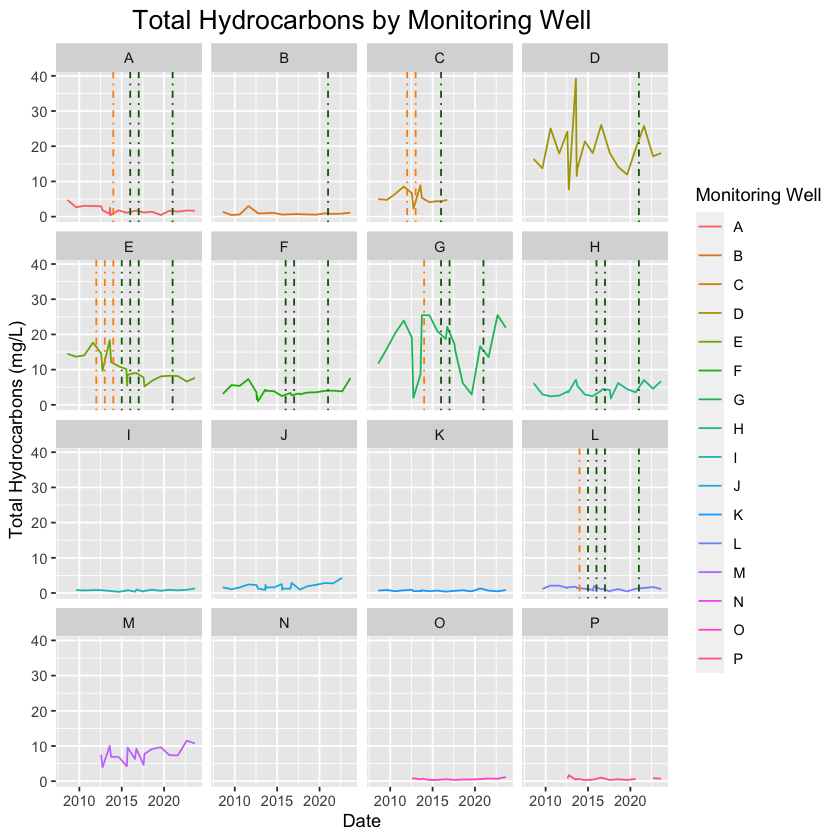

In [115]:
ggplot(Data, aes(Date, total_hydrocarbons, color = MW)) +
  geom_line(na.rm = TRUE) +
  xlim(as.Date(c('1/1/2008', '9/9/2023'), format="%d/%m/%Y")) +
  geom_vline(aes(xintercept=as.numeric(as.Date(year))), 
             data = injdates, linetype=4, color = "darkgreen") +
  geom_vline(aes(xintercept=as.numeric(as.Date(year))), 
             data = pushpulldates, linetype=4, color = "darkorange") +
  facet_wrap(~ MW) +
  theme(legend.position = "right", plot.title = element_text(size = 16, hjust = 0.5)) +
  labs(color = "Monitoring Well") +
  ggtitle("Total Hydrocarbons by Monitoring Well") + 
  ylab("Total Hydrocarbons (mg/L)") 


TPH by injection well only:

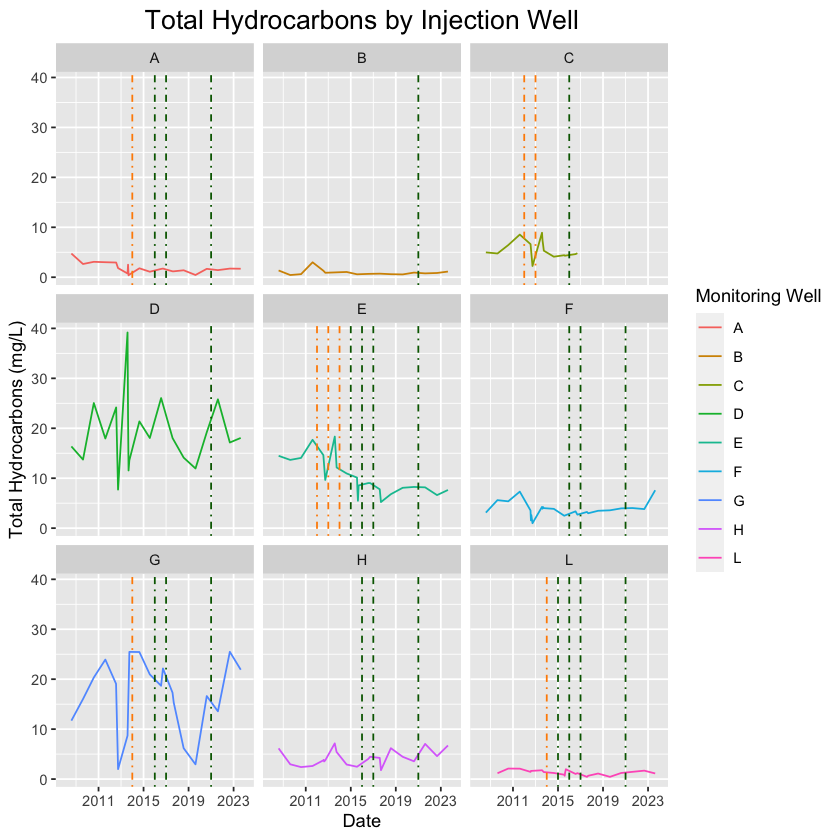

In [116]:
inj <- Data %>% group_by(MW) %>% group_by(Date) %>% filter(MW %in% c("A","B","C","D","E","F","G","H","L"))

ggplot(inj, aes(Date, total_hydrocarbons, color = MW)) +
  geom_line(na.rm = TRUE) +
  geom_vline(aes(xintercept=as.numeric(as.Date(year))), 
             data = injdates, linetype=4, color = "darkgreen") +
  geom_vline(aes(xintercept=as.numeric(as.Date(year))), 
             data = pushpulldates, linetype=4, color = "darkorange") +
  facet_wrap(~ MW) +
  theme(legend.position = "right", plot.title = element_text(size = 16, hjust = 0.5)) +
  labs(color = "Monitoring Well") +
  ggtitle("Total Hydrocarbons by Injection Well") + 
  ylab("Total Hydrocarbons (mg/L)") +
  scale_x_date(date_breaks = "4 years", date_labels = "%Y", 
               limits = as.Date(c("2008-01-01", "2024-01-01")))

Sulfate concentrations by Injection Well:

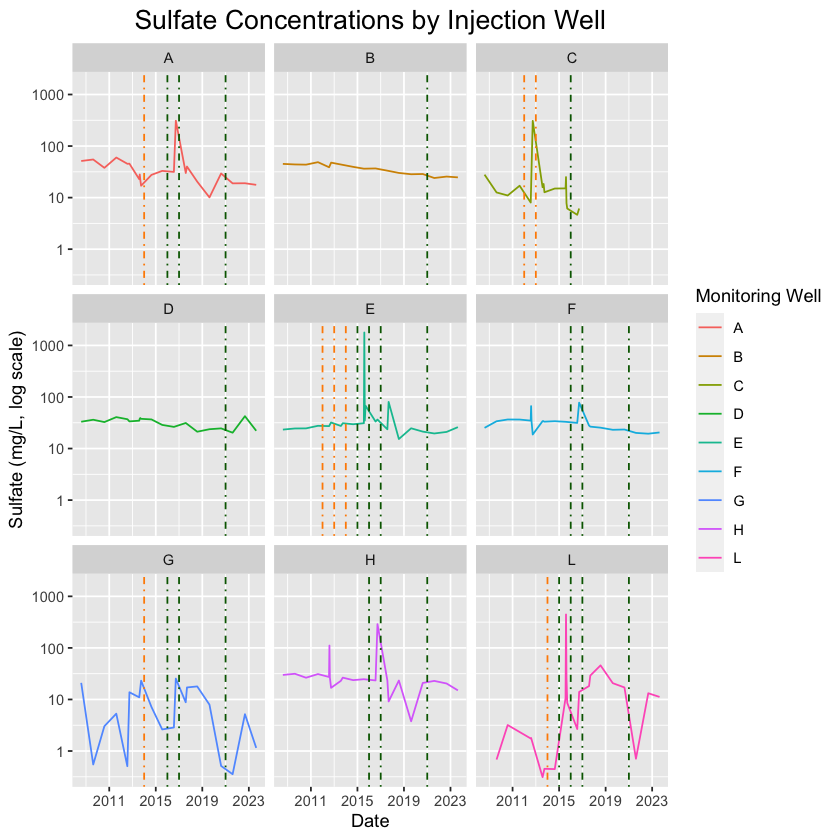

In [90]:
ggplot(sulfate_data2 %>% filter(MW %in% c("A", "B", "C", "D", "E", "F", "G", "H", "L")), 
       aes(Date, Sulfate, color = MW)) +
  geom_line(na.rm = TRUE) +
  scale_y_log10() +
  facet_wrap(~ MW) +
  geom_vline(aes(xintercept=as.numeric(as.Date(year))), 
             data = injdates, linetype=4, color = "darkgreen") +
  geom_vline(aes(xintercept=as.numeric(as.Date(year))), 
             data = pushpulldates, linetype=4, color = "darkorange") +
  labs(color = "Monitoring Well") +
  theme(legend.position = "right", plot.title = element_text(size = 16, hjust = 0.5)) +
  ggtitle("Sulfate Concentrations by Injection Well") + 
  ylab("Sulfate (mg/L, log scale)") +
  scale_x_date(date_breaks = "4 years", date_labels = "%Y") 

Sulfate concentrations by pad-edge well:

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


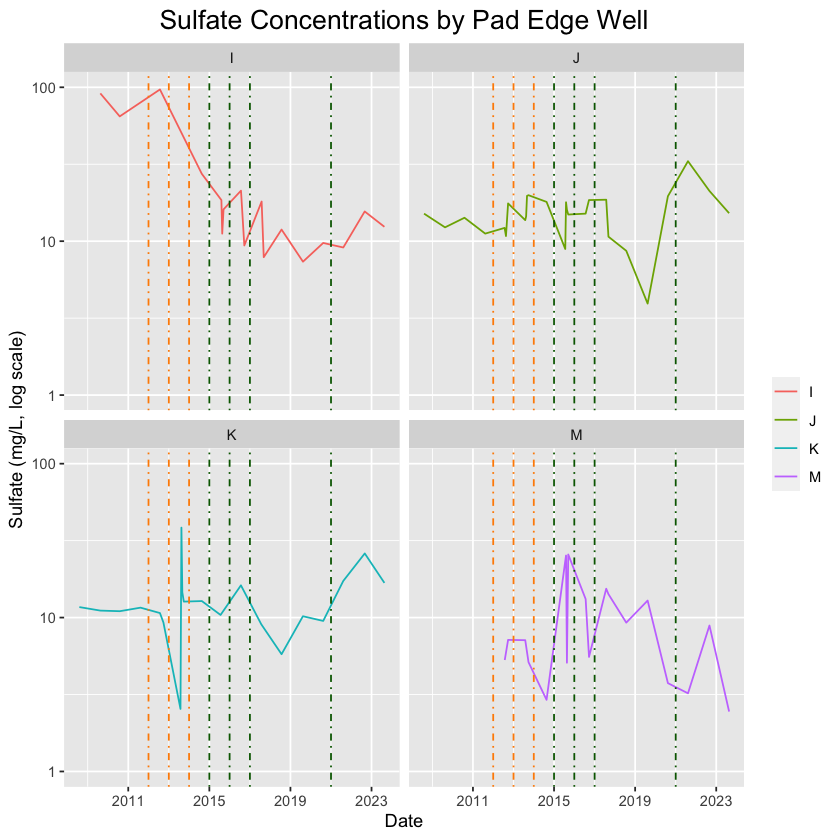

In [91]:
ggplot(sulfate_data2 %>% filter(MW %in% c("I", "J", "K", "M")), 
       aes(Date, Sulfate, color = MW)) +
  geom_line(na.rm = TRUE) +
  scale_y_log10(breaks = c(1, 10, 100), limits = c(1,1e2)) +
  facet_wrap(~ MW) +
  xlim(as.Date(c('1/1/2008', '9/9/2023'), format="%d/%m/%Y")) +
  geom_vline(aes(xintercept=as.numeric(as.Date(inj_date))), 
             data = injdatesonly, linetype=4, color = "darkgreen") +
  geom_vline(aes(xintercept=as.numeric(as.Date(push_date))), 
             data = pushpulldatesonly, linetype=4, color = "darkorange") +
  theme(legend.position = "right", legend.direction = "vertical", legend.key.size = unit(0.6, 'cm'),
        legend.title.align = 0.5, legend.title = element_blank(),
        plot.title = element_text(size = 16, hjust = 0.5)) +
  labs(color = "Monitoring Well") +
  ggtitle("Sulfate Concentrations by Pad Edge Well") + 
  ylab("Sulfate (mg/L, log scale)") +
  guides(color = guide_legend(nrow = 4)) +
  scale_x_date(date_breaks = "4 years", date_labels = "%Y") 